In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import os
from IPython.display import display
import scipy as sp

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
pd.options.display.max_columns = None   # To see the entire columns of dataframes
pd.options.display.max_rows = 100    

from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd', context='paper', spines=True, 
             ticks=True, grid=True, gridlines='dotted', figsize=(6,4.5))

In [2]:
train_combat = pd.read_csv("data/bigCon/bigcon_data/train_combat.csv")
train_payment = pd.read_csv("data/bigCon/bigcon_data/train_payment.csv")
train_pledge = pd.read_csv("data/bigCon/bigcon_data/train_pledge.csv")
train_trade = pd.read_csv("data/bigCon/bigcon_data/train_trade.csv")
train_activity = pd.read_csv("data/bigCon/bigcon_data/train_activity.csv")
train_label = pd.read_csv("data/bigCon/bigcon_data/train_label.csv")

In [3]:
# Copy files in case of retrieving the original ones
combat = train_combat.copy()
pledge = train_pledge.copy()
payment = train_payment.copy()
trade = train_trade.copy()
activity = train_activity.copy()

In [4]:
combat['acc_id'].isnull().sum()

0

In [5]:
combat['acc_id'].count()

1574671

In [6]:
combat.head()

,day,acc_id,char_id,server,class,level,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent
0,1,13809,54861,ap,2,13,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,1,13809,256332,ap,2,13,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,1,13809,307293,ap,3,14,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,1,13809,374964,ap,7,16,0.0,0.0,0.0,0.0,0.0,0.112612,0.098129
4,1,13809,117917,ap,2,11,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [7]:
label = train_label["acc_id"]

In [8]:
combat[combat["acc_id"].isin(label)].head()

,day,acc_id,char_id,server,class,level,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent
0,1,13809,54861,ap,2,13,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,1,13809,256332,ap,2,13,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,1,13809,307293,ap,3,14,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,1,13809,374964,ap,7,16,0.0,0.0,0.0,0.0,0.0,0.112612,0.098129
4,1,13809,117917,ap,2,11,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [9]:
pledge['acc_id'].isnull().sum()

0

In [10]:
payment['acc_id'].isnull().sum()

0

In [11]:
trade['source_acc_id'].isnull().sum()

0

In [12]:
trade['target_acc_id'].isnull().sum()

0

In [13]:
activity['acc_id'].isnull().sum()

0

In [14]:
# Total amount spent per account the whole period 
train_label["total_spent"] = train_label["survival_time"] * train_label["amount_spent"]
train_label["total_spent"]

0         0.163793
1         7.689860
2        10.042642
3         1.039454
4         4.527925
5         2.943151
6         1.969713
7         0.000000
8         0.422606
9         0.000000
10        0.000000
11        0.653071
12        0.491378
13        6.744902
14        0.000000
15        1.948714
16        0.000000
17        0.000000
18        7.543129
19        0.164055
20        1.571485
21        0.163793
22        3.757324
23        0.978557
24        2.854561
25        9.107297
26        0.999556
27        0.000000
28        2.309898
29        0.000000
30        2.843274
31        0.065622
32        9.172394
33        5.541655
34        4.892784
35        0.000000
36        6.583209
37        0.000000
38        0.000000
39        0.000000
40        0.000000
41       21.053669
42        0.000000
43        0.000000
44        6.373218
45        4.428704
46        1.360740
47        3.013367
48        0.984463
49        0.521466
           ...    
39950     1.948714
39951     3.

In [15]:
combat[combat["acc_id"].isin(label)] # label에 있는 숫자만 골라냄

,day,acc_id,char_id,server,class,level,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent
0,1,13809,54861,ap,2,13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,13809,256332,ap,2,13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1,13809,307293,ap,3,14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1,13809,374964,ap,7,16,0.000000,0.000000,0.000000,0.000000,0.000000,0.112612,0.098129
4,1,13809,117917,ap,2,11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,1,62835,129987,am,2,17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,1,62835,74659,am,4,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,1,62835,179366,am,1,14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,1,62835,157318,am,2,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,1,62835,394244,am,5,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
# No need to keep the rows whose "acc_id" does not appear in Label data
# 라벨 테이터 안에 등장하지 않은 acc id 열을 유지 할필요없다 
combat = combat[combat["acc_id"].isin(label)]
pledge = pledge[pledge["acc_id"].isin(label)]
payment = payment[payment["acc_id"].isin(label)]
trade = trade[trade["source_acc_id"].isin(label)]
trade = trade[trade["target_acc_id"].isin(label)]
activity = activity[activity["acc_id"].isin(label)]
# 요렇게 하면 달라지는 게 무엇인가?

## Common Features

In [17]:
# The number of characters per account # 해당 명의당 캐릭터 수 
all_char = pd.concat([train_combat[["char_id", "acc_id"]], 
                      train_pledge[["char_id", "acc_id"]], 
                      train_activity[["char_id", "acc_id"]]])
all_char

,char_id,acc_id
0,54861,13809
1,256332,13809
2,307293,13809
3,374964,13809
4,117917,13809
5,129987,62835
6,74659,62835
7,179366,62835
8,157318,62835
9,394244,62835


In [18]:
char_count = all_char.groupby("char_id")["acc_id"].count()
char_count.head()

char_id
2     2
3    24
5    20
7    14
9     2
Name: acc_id, dtype: int64

In [19]:
# all_char.sort_values(by='acc_id')['acc_id'].nunique()
all_char.sort_values(by='acc_id')['acc_id'].nunique()

40000

In [20]:
# all_char.sort_values(by='acc_id')['char_id'].nunique()
all_char.sort_values(by='acc_id')['char_id'].nunique()

150960

In [21]:
all_char.groupby('acc_id')['char_id'].nunique().head()

acc_id
2     1
5     3
8     7
17    4
20    2
Name: char_id, dtype: int64

In [22]:
all_char[all_char['acc_id']==8]['char_id'].nunique()

7

In [23]:
char_count = pd.DataFrame({"char_count" : char_count})  
# in case of merging # df상태로 만들어주기 구문

In [24]:
all_char.head()
# 전체 char_id에 따른 acc_id 묶어놓은 것!

,char_id,acc_id
0,54861,13809
1,256332,13809
2,307293,13809
3,374964,13809
4,117917,13809


In [25]:
char_count.head()
# 이것의 의미? df 상태 char_count
# 이거 acc_id가 나와야 하는 것 아님?

,char_count
char_id,
2,2
3,24
5,20
7,14
9,2


In [26]:
# Find all the unique servers
total_server = pd.concat([train_combat["server"], 
                          train_pledge["server"], 
                          train_trade["server"], 
                          train_activity["server"]])
total_server.head()

0    ap
1    ap
2    ap
3    ap
4    ap
Name: server, dtype: object

In [27]:
server_list = total_server.unique()
server_list 
## unique server list 추출 

array(['ap', 'am', 'ag', 'ar', 'as', 'ae', 'an', 'az', 'ay', 'bd', 'al',
       'ab', 'av', 'bn', 'ax', 'ai', 'bb', 'aq', 'ad', 'ac', 'bk', 'ak',
       'bl', 'aw', 'aj', 'bm', 'bc', 'at', 'aa', 'bo', 'ao', 'ah', 'au',
       'af', 'bj', 'br', 'bp', 'bg', 'bs', 'bi'], dtype=object)

In [28]:
# Encode servers into integer values
le = LabelEncoder() # ap am 등과 같은 문자형 서버명을 수치형으로 변환 해주는 부분
le.fit(server_list) # server_list에 라벨 인코딩해준다
for df in [combat, pledge, trade, activity]: # 리스트내 4개 요소에 대해서 df로 순서호출
    df["server"] = le.transform(df["server"])
    # server 열에 df[server] 라벨인코딩되어 변환된 값을 넣어준다 
# server column을 categorial하게 만들어줌!

In [29]:
df.head()

,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,boss_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
0,1,75001,397380,0,1.459994,0.000000,0.000000,0.000000,0.000000,0,0.00000,0.000000,0.0,0.0,1.119053,0.033934,0.0
1,1,75001,216231,0,0.286785,2.244221,0.046989,0.000000,0.000000,0,0.00000,0.000000,0.0,0.0,0.000000,-0.013933,0.0
2,1,75711,308769,0,1.049964,2.951697,0.321164,0.166247,0.003463,1,0.24537,0.246819,0.0,0.0,0.000000,-0.001983,0.0
3,1,72230,387177,0,0.232272,4.035346,0.098944,0.000000,0.001732,0,0.00000,0.000000,0.0,0.0,0.000000,-0.028823,0.0
4,1,34253,339862,0,1.102106,0.595805,0.003371,0.000000,0.000000,0,0.00000,0.000000,0.0,0.0,0.000000,0.011752,0.0


## Trade

In [30]:
trade["source_acc_id"].head()

3     78411
6     18212
9     54445
10    69336
11    18640
Name: source_acc_id, dtype: int64

In [31]:
trade.rename(columns={"source_acc_id" : "acc_id"}, inplace=True)
# trade 데이터에서 source_acc_id => acc_id

In [32]:
trade.head()

,day,time,type,server,acc_id,source_char_id,target_acc_id,target_char_id,item_type,item_amount,item_price
3,1,14:37:50,1,17,78411,226143,80350,34764,adena,6.695623e-03,NaN
6,1,14:24:53,1,11,18212,164230,38145,34209,accessory,8.034747e-08,NaN
9,1,20:20:02,0,0,54445,383477,97930,197911,etc,1.339125e-05,0.013231
10,1,02:05:57,0,1,69336,31464,119150,28903,etc,2.678249e-06,0.032727
11,1,23:04:25,1,4,18640,272906,78425,46788,adena,3.077308e-01,NaN


In [33]:
# 같은 계정이면 같은 네트워크 그룹을 가질 확률이 높음 : 아이디 하나로 묶어도 상관없을듯
# EDA
trade.drop(["source_char_id", "target_char_id"], axis=1, inplace=True)
# trade 열 중 해당 두열 drop 시켰다, 

In [34]:
trade.head()

,day,time,type,server,acc_id,target_acc_id,item_type,item_amount,item_price
3,1,14:37:50,1,17,78411,80350,adena,6.695623e-03,NaN
6,1,14:24:53,1,11,18212,38145,accessory,8.034747e-08,NaN
9,1,20:20:02,0,0,54445,97930,etc,1.339125e-05,0.013231
10,1,02:05:57,0,1,69336,119150,etc,2.678249e-06,0.032727
11,1,23:04:25,1,4,18640,78425,adena,3.077308e-01,NaN


In [35]:
trade["item_price"].fillna(trade["item_price"].median(), inplace=True)
## item_prcie 결측치 중간값으로 바꾸었는데 적절한가...?

# 이렇게 해도 되는가?
# 일단 missing으로 해야하는 게 아닌가?

In [36]:
trade['item_price'].isnull().sum()
# null 값 처리 완료 확인 

0

In [37]:
trade.head()

,day,time,type,server,acc_id,target_acc_id,item_type,item_amount,item_price
3,1,14:37:50,1,17,78411,80350,adena,6.695623e-03,0.018362
6,1,14:24:53,1,11,18212,38145,accessory,8.034747e-08,0.018362
9,1,20:20:02,0,0,54445,97930,etc,1.339125e-05,0.013231
10,1,02:05:57,0,1,69336,119150,etc,2.678249e-06,0.032727
11,1,23:04:25,1,4,18640,78425,adena,3.077308e-01,0.018362


In [38]:
trade.head()

,day,time,type,server,acc_id,target_acc_id,item_type,item_amount,item_price
3,1,14:37:50,1,17,78411,80350,adena,6.695623e-03,0.018362
6,1,14:24:53,1,11,18212,38145,accessory,8.034747e-08,0.018362
9,1,20:20:02,0,0,54445,97930,etc,1.339125e-05,0.013231
10,1,02:05:57,0,1,69336,119150,etc,2.678249e-06,0.032727
11,1,23:04:25,1,4,18640,78425,adena,3.077308e-01,0.018362


In [39]:
# Categorize transaction time
# categroial로
bins = [0, 60000, 120000, 180000, 239999] # 구간화 하여 해당 구간에 라벨값 부여
bin_label = [0, 1, 2, 3]   
trade["time_bin"] = pd.cut(pd.to_numeric(trade["time"].str.replace(":", "")),
                           bins=bins, labels=bin_label)
# trade time열 해당 문자열의 :을 공백으로 대체하고 240000 을 맥스치로 하는 
# 빈 을 씌우고, 라벨화를 빈_라벨 로 적용시킨다 

# Those who play during the time other than evening must be differentiated
## 시간대에 다른 타임 ohe 화 
trade["time_bin"] = trade["time_bin"].map({0:1, 1:1, 2:1, 3:0}) 
trade.drop("time", axis=1, inplace=True)

In [40]:
trade.head()

,day,type,server,acc_id,target_acc_id,item_type,item_amount,item_price,time_bin
3,1,1,17,78411,80350,adena,6.695623e-03,0.018362,1.0
6,1,1,11,18212,38145,accessory,8.034747e-08,0.018362,1.0
9,1,0,0,54445,97930,etc,1.339125e-05,0.013231,0.0
10,1,0,1,69336,119150,etc,2.678249e-06,0.032727,1.0
11,1,1,4,18640,78425,adena,3.077308e-01,0.018362,0.0


In [41]:
# trade['time_bin'] = trade['time_bin'].astype('category')
trade['time_bin'] = trade['time_bin'].astype('float64')


In [42]:
trade.info() # 카테고리로 변경하면 time_bin을 pivot table에서 사용못함


<class 'pandas.core.frame.DataFrame'>
Int64Index: 834491 entries, 3 to 2245192
Data columns (total 9 columns):
day              834491 non-null int64
type             834491 non-null int64
server           834491 non-null int32
acc_id           834491 non-null int64
target_acc_id    834491 non-null int64
item_type        834491 non-null object
item_amount      834491 non-null float64
item_price       834491 non-null float64
time_bin         834475 non-null float64
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 60.5+ MB


In [43]:
# Total price per each trade
# 현재는 median으로 대체된 값이 곱해져 있음을 기억해야 함
trade["total_item_price"] = trade["item_amount"] * trade["item_price"]

In [44]:
trade.head()

,day,type,server,acc_id,target_acc_id,item_type,item_amount,item_price,time_bin,total_item_price
3,1,1,17,78411,80350,adena,6.695623e-03,0.018362,1.0,1.229472e-04
6,1,1,11,18212,38145,accessory,8.034747e-08,0.018362,1.0,1.475367e-09
9,1,0,0,54445,97930,etc,1.339125e-05,0.013231,0.0,1.771791e-07
10,1,0,1,69336,119150,etc,2.678249e-06,0.032727,1.0,8.765042e-08
11,1,1,4,18640,78425,adena,3.077308e-01,0.018362,0.0,5.650656e-03


In [45]:
# Make two trade DataFrames for each source and target
source_trade = trade.drop("target_acc_id", axis=1)
target_trade = trade.drop("acc_id", axis=1)
target_trade.rename(columns={"target_acc_id" : "acc_id"}, inplace=True)

In [46]:
source_trade.head()
# source id의 거래내역

,day,type,server,acc_id,item_type,item_amount,item_price,time_bin,total_item_price
3,1,1,17,78411,adena,6.695623e-03,0.018362,1.0,1.229472e-04
6,1,1,11,18212,accessory,8.034747e-08,0.018362,1.0,1.475367e-09
9,1,0,0,54445,etc,1.339125e-05,0.013231,0.0,1.771791e-07
10,1,0,1,69336,etc,2.678249e-06,0.032727,1.0,8.765042e-08
11,1,1,4,18640,adena,3.077308e-01,0.018362,0.0,5.650656e-03


In [47]:
target_trade.head()
# target id의 거래내역

,day,type,server,acc_id,item_type,item_amount,item_price,time_bin,total_item_price
3,1,1,17,80350,adena,6.695623e-03,0.018362,1.0,1.229472e-04
6,1,1,11,38145,accessory,8.034747e-08,0.018362,1.0,1.475367e-09
9,1,0,0,97930,etc,1.339125e-05,0.013231,0.0,1.771791e-07
10,1,0,1,119150,etc,2.678249e-06,0.032727,1.0,8.765042e-08
11,1,1,4,78425,adena,3.077308e-01,0.018362,0.0,5.650656e-03


In [48]:
# Total number of trade occurence per account the whole period

source_trade_count = source_trade["acc_id"].value_counts()
target_trade_count = target_trade["acc_id"].value_counts()

In [49]:
source_trade_count.head() # 해당 명의유저마다 trade count

50413     3552
111023    2496
59264     2039
120428    1834
97968     1727
Name: acc_id, dtype: int64

In [50]:
target_trade_count.head()

50413     3480
120428    2854
62350     1972
91062     1848
111023    1741
Name: acc_id, dtype: int64

In [51]:
source_trade_count = pd.DataFrame({"acc_id" : source_trade_count.index,
                                   "count" : source_trade_count})    # Make a dataframe to merge based on "acc_id"
target_trade_count = pd.DataFrame({"acc_id" : target_trade_count.index,
                                   "count" : target_trade_count})

In [52]:
source_trade_count.head()

,acc_id,count
50413,50413,3552
111023,111023,2496
59264,59264,2039
120428,120428,1834
97968,97968,1727


In [53]:
target_trade_count.head()

,acc_id,count
50413,50413,3480
120428,120428,2854
62350,62350,1972
91062,91062,1848
111023,111023,1741


In [54]:
trade_count = pd.merge(source_trade_count, target_trade_count, on = "acc_id")
# acc_id 해당열에 머지 시킨다 
# merge ON : Column or index level names to join on.
trade_count


,acc_id,count_x,count_y
0,50413,3552,3480
1,111023,2496,1741
2,59264,2039,191
3,120428,1834,2854
4,97968,1727,870
5,3139,1619,1609
6,116315,1451,1344
7,52260,1448,1245
8,91062,1409,1848
9,92665,1384,1151


In [55]:
trade_count["count"] = trade_count["count_x"] + trade_count["count_y"]
trade_count.head()

,acc_id,count_x,count_y,count
0,50413,3552,3480,7032
1,111023,2496,1741,4237
2,59264,2039,191,2230
3,120428,1834,2854,4688
4,97968,1727,870,2597


In [56]:
trade_count.drop(["count_x", "count_y"], axis=1, inplace=True)
trade_count.head()

,acc_id,count
0,50413,7032
1,111023,4237
2,59264,2230
3,120428,4688
4,97968,2597


In [57]:
# trade.head()

In [58]:
# Remove columns that do not seem necessary
# 서버는 necessary할 수도 있지 않을까?
trade.drop(["target_acc_id", "item_type", "item_amount", "item_price"],
           axis=1, inplace=True)

In [59]:
tt = pd.pivot_table(data=trade, index=["acc_id", "day"], 
               values=["time_bin", "total_item_price"], aggfunc=sum)
pd.pivot_table(data=trade, index=["acc_id", "day"], 
               values=["time_bin", "total_item_price"], aggfunc=sum).head(20)


time_bin  total_item_price
acc_id day                            
2      1         3.0      1.867780e-06
       2         1.0      6.393257e-03
       3         1.0      1.249094e-06
       5         0.0      1.998430e-09
       12        0.0      5.005340e-09
       14        1.0      4.506484e-09
       16        1.0      1.439520e-10
       19        1.0      2.336234e-09
8      11        1.0      2.813892e-08
17     6         0.0      1.570696e-11
       7         1.0      8.765042e-14
       9         0.0      9.465444e-10
       11        1.0      5.840799e-10
       15        0.0      9.566418e-13
       17        0.0      7.205816e-10
       18        1.0      2.758734e-11
       19        1.0      4.917890e-02
       20        0.0      3.402840e-11
       23        0.0      1.714943e-11
       24        5.0      2.950747e-02

In [60]:
typo = pd.pivot_table(data=trade, index=["acc_id", "day"], values=["type"])
pd.pivot_table(data=trade, index=["acc_id", "day"], values=["type"]).head(20)
# 상점이냐, 개인거래냐

type
acc_id day      
2      1     0.0
       2     1.0
       3     0.0
       5     0.0
       12    0.0
       14    0.0
       16    0.0
       19    0.0
8      11    0.0
17     6     0.0
       7     0.0
       9     0.0
       11    0.0
       15    0.0
       17    0.0
       18    0.0
       19    1.0
       20    0.0
       23    0.0
       24    0.2

In [61]:
# trade = pd.concat([tt,typo])
# trade.head(20)

In [62]:
trade = pd.concat(
    [ pd.pivot_table(data=trade, index=["acc_id", "day"], 
                     values=["time_bin", "total_item_price"], aggfunc=sum), 
     # sum all the prices
    pd.pivot_table(data=trade, index=["acc_id", "day"], 
                   values=["type"])], axis=1) # mean for trade type

In [63]:
trade.head(20) # trade!

time_bin  total_item_price  type
acc_id day                                  
2      1         3.0      1.867780e-06   0.0
       2         1.0      6.393257e-03   1.0
       3         1.0      1.249094e-06   0.0
       5         0.0      1.998430e-09   0.0
       12        0.0      5.005340e-09   0.0
       14        1.0      4.506484e-09   0.0
       16        1.0      1.439520e-10   0.0
       19        1.0      2.336234e-09   0.0
8      11        1.0      2.813892e-08   0.0
17     6         0.0      1.570696e-11   0.0
       7         1.0      8.765042e-14   0.0
       9         0.0      9.465444e-10   0.0
       11        1.0      5.840799e-10   0.0
       15        0.0      9.566418e-13   0.0
       17        0.0      7.205816e-10   0.0
       18        1.0      2.758734e-11   0.0
       19        1.0      4.917890e-02   1.0
       20        0.0      3.402840e-11   0.0
       23        0.0      1.714943e-11   0.0
       24        5.0      2.950747e-02   0.2

## Pledge(혈맹)

In [64]:
pledge.head()

,day,acc_id,char_id,server,pledge_id,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,etc_cnt,combat_play_time,non_combat_play_time
0,1,106660,345122,0,381,0.036089,0.036089,0.0,0.0,0.0,0.0,0.000000,0.007078,0.027568,0.000000
1,1,46383,161773,0,10892,0.036089,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.006139
2,1,18495,321373,0,13705,0.036089,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000347
3,1,118293,366707,0,2982,0.036089,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.001042
4,1,50421,158063,0,27104,0.216536,0.072179,0.0,0.0,0.0,0.0,0.098883,0.056626,0.083978,0.000000


In [65]:
pledge[pledge['acc_id']==46383].head()

,day,acc_id,char_id,server,pledge_id,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,etc_cnt,combat_play_time,non_combat_play_time
1,1,46383,161773,0,10892,0.036089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006139
18811,1,46383,210718,17,5135,0.036089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004633
54866,2,46383,210718,17,5135,0.036089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042162
91916,3,46383,210718,17,5135,0.036089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001274
93289,3,46383,47841,17,35276,0.036089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000463


In [66]:
# 위의 상황을 보면 server가 다른데 char_id가 같은 경우가 존재합니다!
# pledge _ p 붙이기 

In [67]:
# The number of members in each pledge
pledge_num_people = pledge["pledge_id"].value_counts()
pledge_num_people.head()
# 혈맹이 같은 사람들끼리의 정보

36551    4133
13214    3355
17546    3049
10843    2744
33924    2633
Name: pledge_id, dtype: int64

# 질문 : 여기에서 server를 없애도 되나요?
## server 별로 분류해야 할까요...?

In [68]:
# 일단은 server를 제거하지 않았습니다!
pledge.drop(["char_id", "pledge_id"], axis=1, inplace=True)

In [69]:
pledge = pd.pivot_table(data=pledge, index=['server','acc_id', "day"], aggfunc=sum)

In [70]:
pledge

combat_char_cnt  combat_play_time   etc_cnt  \
server acc_id day                                                
0      75     8           1.190948          1.883065  0.332678   
              15          0.505250          0.451973  0.276052   
              16          0.288715          0.404134  0.063704   
              17          0.721786          0.902671  0.254818   
              18          0.902233          0.979004  0.325600   
              19          0.613518          1.014680  0.233583   
              20          0.288715          0.473981  0.155722   
              21          0.433072          0.629889  0.375148   
              22          0.505250          0.706801  0.198191   
              23          0.433072          0.526336  0.247739   
              24          0.396983          0.498884  0.084939   
              25          0.721786          0.869891  0.148644   
              26          0.974412          1.030433  0.686592   
              27          0.613518          1.163407  0.396383   
              28          0.685697          1.124835  0.587496   
       161    4           0.000000          0.000000  0.000000   
              18          0.000000          0.000000  0.000000   
       260    8           0.000000          0.000000  0.000000   
              9           0.000000          0.000000  0.000000   
              10          0.000000          0.000000  0.000000   
              11          0.000000          0.000000  0.000000   
              12          0.000000          0.000000  0.000000   
              13          0.000000          0.000000  0.000000   
              15          0.036089          0.020965  0.007078   
              16          0.036089          0.013436  0.000000   
              17          0.036089          0.025599  0.007078   
              21          0.036089          0.015753  0.000000   
              23          0.000000          0.000000  0.000000   
              27          0.000000          0.000000  0.000000   
              28          0.000000          0.000000  0.000000   
       309    1           1.190948          3.423039  0.906018   
              2           2.417984          6.535071  2.328749   
              3           2.057091          6.258814  2.449080   
              4           1.840555          5.095639  1.366105   
              5           2.021002          5.387302  2.328749   
              6           1.551841          5.890240  1.047583   
              7           1.660109          5.518654  1.259931   
              8           2.526252          4.913321  4.777829   
              9           2.237538          7.321796  1.564297   
              10          2.562342          7.397665  2.314593   
              11          2.778878          7.587165  3.496663   
              12          2.670610          7.050867  5.719238   
              13          2.093181          6.407426  1.380262   
              14          2.309716          6.891252  3.114437   
              15          2.417984          4.641929  4.338977   
              16          2.417984          6.268428  1.486436   
              17          2.454074          7.229131  2.781758   
              18          2.201448          7.062682  1.720018   
              19          2.129270          6.207385  0.877705   
              20          2.165359          5.927538  0.941409   
...                            ...               ...       ...   
38     126699 24          0.938322          0.305910  0.056626   
              25          0.685697          0.324327  0.028313   
              26          0.180447          0.050502  0.000000   
              27          0.000000          0.000000  0.000000   
       126817 5           0.433072          0.201083  0.049548   
              12          0.396983          0.213129  0.028313   
              19          0.360893          0.145252  0.007078   
       127120 2           0.144357          0.033359  0.000

In [71]:
# Change name of the columns which are same with the ones in combat file
rename_dict = {"combat_char_cnt" : "p_combat_char_cnt", 
               "combat_play_time" : "p_combat_play_time",
               "non_combat_play_time" : "p_non_combat_play_time",
               "play_char_cnt" : "p_play_char_cnt",
               "etc_cnt" : "p_etc_cnt", 
               "random_attacker_cnt" : "p_random_attacker_cnt",
               'same_pledge_cnt' : 'p_same_pledge_cnt', 
               "temp_cnt" : "p_temp_cnt", 
               "random_defender_cnt" : "p_random_defender_cnt"}
pledge.rename(columns=rename_dict, inplace=True)

In [72]:
pledge.head(20)

p_combat_char_cnt  p_combat_play_time  p_etc_cnt  \
server acc_id day                                                     
0      75     8             1.190948            1.883065   0.332678   
              15            0.505250            0.451973   0.276052   
              16            0.288715            0.404134   0.063704   
              17            0.721786            0.902671   0.254818   
              18            0.902233            0.979004   0.325600   
              19            0.613518            1.014680   0.233583   
              20            0.288715            0.473981   0.155722   
              21            0.433072            0.629889   0.375148   
              22            0.505250            0.706801   0.198191   
              23            0.433072            0.526336   0.247739   
              24            0.396983            0.498884   0.084939   
              25            0.721786            0.869891   0.148644   
              26            0.974412            1.030433   0.686592   
              27            0.613518            1.163407   0.396383   
              28            0.685697            1.124835   0.587496   
       161    4             0.000000            0.000000   0.000000   
              18            0.000000            0.000000   0.000000   
       260    8             0.000000            0.000000   0.000000   
              9             0.000000            0.000000   0.000000   
              10            0.000000            0.000000   0.000000   

                   p_non_combat_play_time  p_play_char_cnt  pledge_combat_cnt  \
server acc_id day                                                               
0      75     8                  0.000000         4.402897           0.043710   
              15                 0.000000         1.118769           0.000000   
              16                 0.000000         1.190948           0.020034   
              17                 0.000000         2.165359           0.000000   
              18                 0.000000         2.345806           0.018213   
              19                 0.000000         2.417984           0.000000   
              20                 0.000000         1.732287           0.000000   
              21                 0.000000         2.273627           0.000000   
              22                 0.000000         2.021002           0.000000   
              23                 0.000000         2.129270           0.000000   
              24                 0.000000         1.912734           0.000000   
              25                 0.000000         2.742788           0.000000   
              26                 0.000000         2.417984           0.003643   
              27                 0.000000         2.562342           0.000000   
              28                 0.000000         2.165359           0.000000   
       161    4                  0.012278         0.144357           0.000000   
              18                 0.009614         0.216536           0.000000   
       260    8                  0.007992         0.108268           0.000000   
              9                  0.008687         0.144357           0.000000   
              10                 0.040657         0.360893           0.000000   

                   p_random_attacker_cnt  p_random_defender_cnt  \
server acc_id day                                                 
0      75     8                 2.549816               0.429188   
              15                0.000000               0.071531   
              16                0.451866               0.214594   
              17                0.000000               0.429188   
              18                0.451866               0.357657   
              19                3.292167               0.143063   
              20                0.000000               0.071531   
              21                1.065113               0.071531   
   

## Activity

In [73]:
# Remove "char_id"
activity.drop("char_id", axis=1, inplace=True)

In [74]:
activity.head()

,day,acc_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,boss_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
0,1,75001,0,1.459994,0.000000,0.000000,0.000000,0.000000,0,0.00000,0.000000,0.0,0.0,1.119053,0.033934,0.0
1,1,75001,0,0.286785,2.244221,0.046989,0.000000,0.000000,0,0.00000,0.000000,0.0,0.0,0.000000,-0.013933,0.0
2,1,75711,0,1.049964,2.951697,0.321164,0.166247,0.003463,1,0.24537,0.246819,0.0,0.0,0.000000,-0.001983,0.0
3,1,72230,0,0.232272,4.035346,0.098944,0.000000,0.001732,0,0.00000,0.000000,0.0,0.0,0.000000,-0.028823,0.0
4,1,34253,0,1.102106,0.595805,0.003371,0.000000,0.000000,0,0.00000,0.000000,0.0,0.0,0.000000,0.011752,0.0


In [75]:
# Total play time per account the whole period
total_play = activity.groupby("acc_id")["playtime"].sum()
total_play = pd.DataFrame({"total_play_time" : total_play})  # in case of mergi

In [76]:
total_play.head()

,total_play_time
acc_id,
2,92.685947
5,6.193126
8,19.034441
17,28.823040
20,25.910161


In [77]:
activity[activity['acc_id']==46383].head()

,day,acc_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,boss_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
1697,1,46383,0,0.130357,0.066463,0.039652,0.0,0.178325,0,0.0,0.0,0.0,0.000000,0.0,0.000066,0.0
31238,1,46383,17,0.381589,0.054317,0.003325,0.0,0.000000,0,0.0,0.0,0.0,0.000000,0.0,-0.002443,0.0
31239,1,46383,17,0.004740,0.000000,0.000000,0.0,0.000000,0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
85646,2,46383,17,1.327268,1.017187,0.040819,0.0,0.006926,0,0.0,0.0,0.0,0.177759,0.0,-0.000792,0.0
85647,2,46383,17,0.011851,0.000000,0.000000,0.0,0.000000,0,0.0,0.0,0.0,0.000000,0.0,0.000261,0.0


In [78]:
pd.pivot_table(data=activity, index=["server","acc_id","day"], aggfunc='sum')

boss_monster     death  enchant_count  exp_recovery  \
server acc_id day                                                        
0      75     8               0  0.000000            0.0           0.0   
              9               0  0.000000            0.0           0.0   
              10              0  0.000000            0.0           0.0   
              11              0  0.000000            0.0           0.0   
              12              0  0.000000            0.0           0.0   
              13              0  0.000000            0.0           0.0   
              14              0  0.000000            0.0           0.0   
              15              0  0.000000            0.0           0.0   
              16              0  0.000000            0.0           0.0   
              17              0  0.000000            0.0           0.0   
              18              0  0.000000            0.0           0.0   
              19              0  0.000000            0.0           0.0   
              20              0  0.000000            0.0           0.0   
              21              0  0.000000            0.0           0.0   
              22              0  0.000000            0.0           0.0   
              23              0  0.000000            0.0           0.0   
              24              0  0.000000            0.0           0.0   
              25              0  0.000000            0.0           0.0   
              26              0  0.000000            0.0           0.0   
              27              0  0.000000            0.0           0.0   
              28              0  0.000000            0.0           0.0   
       161    4               0  0.000000            0.0           0.0   
              18              0  0.000000            0.0           0.0   
       260    8               0  0.000000            0.0           0.0   
              9               0  0.000000            0.0           0.0   
              10              0  0.000000            0.0           0.0   
              11              0  0.000000            0.0           0.0   
              12              0  0.000000            0.0           0.0   
              13              0  0.000000            0.0           0.0   
              15              0  0.000000            0.0           0.0   
              16              0  0.000000            0.0           0.0   
              17              0  0.000000            0.0           0.0   
              21              0  0.000000            0.0           0.0   
              23              0  0.000000            0.0           0.0   
              27              0  0.000000            0.0           0.0   
              28              0  0.000000            0.0           0.0   
       266    27              0  0.000000            0.0           0.0   
              28              0  0.000000            0.0           0.0   
       281    2               0  0.000000            0.0           0.0   
              5               0  0.490740            0.0           0.0   
              6               0  1.226849            0.0           0.0   
              7               0  0.245370            0.0           0.0   
              8               1  0.000000            0.0           0.0   
              9               0  0.000000            0.0           0.0   
              10              1  0.000000            0.0           0.0   
              11              0  0.000000            0.0           0.0   
              12              0  0.000000            0.0           0.0   
              14              0  0.000000            0.0           0.0   
              15              0  0.000000            0.0           0.0   
              16              0  0.000000            0.0           0.0   
...                         ...       ...            ...           ...   
39     129217 1               0  0.000000            0.0           0.0   
              2        

In [79]:
pd.pivot_table(data=activity.drop("server", axis=1),
               index=["acc_id", "day"], aggfunc=sum).head()
# server 빼기 

boss_monster  death  enchant_count  exp_recovery  fishing  \
acc_id day                                                              
2      1               0    0.0            0.0           0.0      0.0   
       2               0    0.0            0.0           0.0      0.0   
       3               0    0.0            0.0           0.0      0.0   
       4               0    0.0            0.0           0.0      0.0   
       5               0    0.0            0.0           0.0      0.0   

            game_money_change  npc_kill  party_exp  playtime  private_shop  \
acc_id day                                                                   
2      1             1.022652       0.0        0.0  2.737490      2.493091   
       2            -1.042002       0.0        0.0  3.405864      3.188761   
       3             0.450366       0.0        0.0  3.412974      3.223522   
       4            -0.007215       0.0        0.0  3.412974      3.171419   
       5             0.015365       0.0        0.0  3.412974      3.175172   

            quest_exp  revive  solo_exp  
acc_id day                               
2      1          0.0     0.0       0.0  
       2          0.0     0.0       0.0  
       3          0.0     0.0       0.0  
       4          0.0     0.0       0.0  
       5          0.0     0.0       0.0

In [80]:
# pd.pivot_table(data=activity, index=["acc_id", "day"], values=["server"]).head()
pd.pivot_table(data=activity, index=["acc_id", "day"], values=["server"])
# pivot table_ser

server
acc_id day        
2      1      20.0
       2      20.0
       3      20.0
       4      20.0
       5      20.0
       6      20.0
       7      20.0
       8      20.0
       9      20.0
       10     20.0
       11     20.0
       12     20.0
       13     20.0
       14     20.0
       15     20.0
       16     20.0
       17     20.0
       18     20.0
       19     20.0
       20     20.0
       21     20.0
       22     20.0
       23     20.0
       24     20.0
       25     20.0
       26     20.0
       27     20.0
       28     20.0
5      9      16.0
       14     16.0
       20     16.0
       22     16.0
       23     16.0
       24     16.0
       25     16.0
       26     16.0
       27     16.0
       28     16.0
8      1      14.0
       2      14.0
       3      14.0
       4      14.0
       5      14.0
       6      14.0
       7      14.0
       8      14.0
       9      14.0
       10     14.0
       11     14.0
       12     14.0
...            ...
130470 5       7.0
       6       7.0
       7       7.0
       9       7.0
       10      7.0
       11      7.0
       12      7.0
       13      7.0
       14      7.0
       15      7.0
       16      7.0
       17      7.0
       18      7.0
       19      7.0
       20      7.0
       21      4.0
       22      7.0
       24      7.0
       25      7.0
       26      7.0
       27      7.0
       28      7.0
130473 1      22.0
       2      22.0
       3      22.0
       4      22.0
       5      22.0
       6      22.0
       7      22.0
       8      22.0
       9      22.0
       10     22.0
       11     22.0
       12     22.0
       13     22.0
       14     22.0
       15     22.0
       16     22.0
       17     22.0
       18     22.0
       19     22.0
       20     22.0
       21     22.0
       22     22.0
       23     22.0
       24     22.0
       25     22.0
       26     22.0
       27     22.0
       28     22.0

[947519 rows x 1 columns]

In [81]:
# Sum all the values per day for each account # 각 계정당 하루 가치
activity = pd.concat([pd.pivot_table(data=activity.drop("server", axis=1),
                                     index=["acc_id", "day"], aggfunc=sum),
                     pd.pivot_table(data=activity, index=["acc_id", "day"], 
                                    values=["server"])], 
                     axis=1)

# Total exp
activity["total_exp"] = activity["solo_exp"] + activity["party_exp"] + activity["quest_exp"]

# How long do users spend time fishing?
activity["fishing_prop"] = activity["fishing"] / activity["playtime"]

activity

boss_monster      death  enchant_count  exp_recovery   fishing  \
acc_id day                                                                   
2      1               0   0.000000            0.0           0.0  0.000000   
       2               0   0.000000            0.0           0.0  0.000000   
       3               0   0.000000            0.0           0.0  0.000000   
       4               0   0.000000            0.0           0.0  0.000000   
       5               0   0.000000            0.0           0.0  0.000000   
       6               0   0.000000            0.0           0.0  0.000000   
       7               0   0.000000            0.0           0.0  0.000000   
       8               0   0.000000            0.0           0.0  0.000000   
       9               0   0.000000            0.0           0.0  0.000000   
       10              0   0.000000            0.0           0.0  0.000000   
       11              0   0.000000            0.0           0.0  0.000000   
       12              0   0.000000            0.0           0.0  0.000000   
       13              0   0.000000            0.0           0.0  0.000000   
       14              0   0.000000            0.0           0.0  0.000000   
       15              0   0.000000            0.0           0.0  0.000000   
       16              0   0.000000            0.0           0.0  0.000000   
       17              0   0.000000            0.0           0.0  0.000000   
       18              0   0.000000            0.0           0.0  0.000000   
       19              0   0.000000            0.0           0.0  0.000000   
       20              0   0.000000            0.0           0.0  0.000000   
       21              0   0.000000            0.0           0.0  0.000000   
       22              0   0.000000            0.0           0.0  0.000000   
       23              0   0.000000            0.0           0.0  0.000000   
       24              0   0.000000            0.0           0.0  0.000000   
       25              0   0.000000            0.0           0.0  0.000000   
       26              0   0.000000            0.0           0.0  0.000000   
       27              0   0.000000            0.0           0.0  0.000000   
       28              0   0.000000            0.0           0.0  0.000000   
5      9               1   0.000000            0.0           0.0  0.000000   
       14              1   0.000000            0.0           0.0  0.000000   
       20              1   0.000000            0.0           0.0  0.000000   
       22              1   0.000000            0.0           0.0  0.000000   
       23              1   0.000000            0.0           0.0  0.021292   
       24              1   0.000000            0.0           0.0  0.000000   
       25              1   0.000000            0.0           0.0  0.000000   
       26              1   0.245370            0.0           0.0  0.375032   
       27              1   0.000000            0.0           0.0  0.000000   
       28              0   0.000000            0.0           0.0  0.000000   
8      1               0   0.000000            0.0           0.0  0.000000   
       2               0   0.000000            0.0           0.0  0.000000   
       3               0   0.000000            0.0           0.0  0.533277   
       4               0   0.000000            0.0           0.0  0.000000   
       5               1   3.435177            0.0           0.0  0.622157   
       6               0  85.143314            0.0           0.0  0.000000   
       7               0   0.000000            0.0           0.0  0.000000   
       8               0   0.000000            0.0           0.0  0.533277   
       9               0   0.000000            0.0           0.0  0.000000   
       10              0   0.000000            0.0           0.0  0.610543   
       11              0   0.000000            0.0           0.0  0.000000   
       12              0   0.00000

In [82]:
activity.columns

Index(['boss_monster', 'death', 'enchant_count', 'exp_recovery', 'fishing',
       'game_money_change', 'npc_kill', 'party_exp', 'playtime',
       'private_shop', 'quest_exp', 'revive', 'solo_exp', 'server',
       'total_exp', 'fishing_prop'],
      dtype='object')

## Combat

In [83]:
combat[combat['acc_id']==46383].head()

,day,acc_id,char_id,server,class,level,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent
1303341,1,46383,161773,0,1,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1303342,1,46383,119714,17,3,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1303343,1,46383,210718,17,0,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1308243,2,46383,96109,17,2,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1308244,2,46383,119714,17,3,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
# Remove "char_id", "class", "server"
# '클리스도 일단 안 날리는게 좋지 않을까?'
combat.drop(["char_id"], axis=1, inplace=True)

combat.head()

,day,acc_id,server,class,level,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent
0,1,13809,15,2,13,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,1,13809,15,2,13,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,1,13809,15,3,14,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,1,13809,15,7,16,0.0,0.0,0.0,0.0,0.0,0.112612,0.098129
4,1,13809,15,2,11,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [85]:
# Max level? or Mean level?
max_level = combat.groupby(["server","acc_id"])["level"].max()
mean_level = combat.groupby(["server","acc_id"])["level"].mean()
combat.drop("level", axis=1, inplace=True)
combat.head(10)

,day,acc_id,server,class,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent
0,1,13809,15,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,1,13809,15,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,1,13809,15,3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,1,13809,15,7,0.0,0.0,0.0,0.0,0.0,0.112612,0.098129
4,1,13809,15,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
5,1,62835,12,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
6,1,62835,12,4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
7,1,62835,12,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
8,1,62835,12,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
9,1,62835,12,5,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [86]:
pd.pivot_table(data=combat, index=["server","acc_id", "day"], aggfunc=sum).head()

class  etc_cnt  num_opponent  pledge_cnt  \
server acc_id day                                             
0      75     8        6      0.0           0.0         0.0   
              9        6      0.0           0.0         0.0   
              10       6      0.0           0.0         0.0   
              11       6      0.0           0.0         0.0   
              12       6      0.0           0.0         0.0   

                   random_attacker_cnt  random_defender_cnt  same_pledge_cnt  \
server acc_id day                                                              
0      75     8                    0.0                  0.0              0.0   
              9                    0.0                  0.0              0.0   
              10                   0.0                  0.0              0.0   
              11                   0.0                  0.0              0.0   
              12                   0.0                  0.0              0.0   

                   temp_cnt  
server acc_id day            
0      75     8         0.0  
              9         0.0  
              10        0.0  
              11        0.0  
              12        0.0

In [87]:
combat = pd.pivot_table(data=combat, index=["server","acc_id", "day"], aggfunc=sum)
combat.head()

class  etc_cnt  num_opponent  pledge_cnt  \
server acc_id day                                             
0      75     8        6      0.0           0.0         0.0   
              9        6      0.0           0.0         0.0   
              10       6      0.0           0.0         0.0   
              11       6      0.0           0.0         0.0   
              12       6      0.0           0.0         0.0   

                   random_attacker_cnt  random_defender_cnt  same_pledge_cnt  \
server acc_id day                                                              
0      75     8                    0.0                  0.0              0.0   
              9                    0.0                  0.0              0.0   
              10                   0.0                  0.0              0.0   
              11                   0.0                  0.0              0.0   
              12                   0.0                  0.0              0.0   

                   temp_cnt  
server acc_id day            
0      75     8         0.0  
              9         0.0  
              10        0.0  
              11        0.0  
              12        0.0

## Payment

In [88]:
# 혹시 서버때문에 달라진 것은 아닌가?
total_payment = payment.groupby("acc_id")["amount_spent"].sum()
total_payment.head()

acc_id
8     1.404644
20    0.896531
21    2.695461
38    6.309749
41    0.035204
Name: amount_spent, dtype: float64

In [89]:
train_label[train_label["acc_id"] == 8]

###### Why are they different????? ####

,acc_id,survival_time,amount_spent,total_spent
5494,8,64,0.02031,1.299843


In [90]:
# Check the results
display(combat.tail())
display(payment.head())
display(pledge.head())
display(trade.head())
display(activity.head())

class   etc_cnt  num_opponent  pledge_cnt  \
server acc_id day                                              
38     129982 19       3  0.112612      0.686901    0.320921   
       130027 12       7  0.000000      1.079416    0.834395   
       130434 1        2  0.000000      0.294386    0.192553   
              2        2  0.112612      0.490644    0.256737   
              3        2  0.000000      0.785030    0.706027   

                   random_attacker_cnt  random_defender_cnt  same_pledge_cnt  \
server acc_id day                                                              
38     129982 19                   0.0             1.183064              0.0   
       130027 12                   0.0             1.183064              0.0   
       130434 1                    0.0             0.000000              0.0   
              2                    0.0             0.000000              0.0   
              3                    0.0             0.000000              0.0   

                   temp_cnt  
server acc_id day            
38     129982 19        0.0  
       130027 12        0.0  
       130434 1         0.0  
              2         0.0  
              3         0.0

,day,acc_id,amount_spent
0,18,27835,0.826123
1,23,27835,0.011735
2,27,27835,0.035204
3,17,12351,0.528062
4,11,125437,0.633674


p_combat_char_cnt  p_combat_play_time  p_etc_cnt  \
server acc_id day                                                     
0      75     8             1.190948            1.883065   0.332678   
              15            0.505250            0.451973   0.276052   
              16            0.288715            0.404134   0.063704   
              17            0.721786            0.902671   0.254818   
              18            0.902233            0.979004   0.325600   

                   p_non_combat_play_time  p_play_char_cnt  pledge_combat_cnt  \
server acc_id day                                                               
0      75     8                       0.0         4.402897           0.043710   
              15                      0.0         1.118769           0.000000   
              16                      0.0         1.190948           0.020034   
              17                      0.0         2.165359           0.000000   
              18                      0.0         2.345806           0.018213   

                   p_random_attacker_cnt  p_random_defender_cnt  \
server acc_id day                                                 
0      75     8                 2.549816               0.429188   
              15                0.000000               0.071531   
              16                0.451866               0.214594   
              17                0.000000               0.429188   
              18                0.451866               0.357657   

                   p_same_pledge_cnt  p_temp_cnt  
server acc_id day                                 
0      75     8             1.591434    1.977661  
              15            0.000000    1.582129  
              16            0.000000    0.791064  
              17            0.000000    1.681012  
              18            0.000000    2.373193

time_bin  total_item_price  type
acc_id day                                  
2      1         3.0      1.867780e-06   0.0
       2         1.0      6.393257e-03   1.0
       3         1.0      1.249094e-06   0.0
       5         0.0      1.998430e-09   0.0
       12        0.0      5.005340e-09   0.0

boss_monster  death  enchant_count  exp_recovery  fishing  \
acc_id day                                                              
2      1               0    0.0            0.0           0.0      0.0   
       2               0    0.0            0.0           0.0      0.0   
       3               0    0.0            0.0           0.0      0.0   
       4               0    0.0            0.0           0.0      0.0   
       5               0    0.0            0.0           0.0      0.0   

            game_money_change  npc_kill  party_exp  playtime  private_shop  \
acc_id day                                                                   
2      1             1.022652       0.0        0.0  2.737490      2.493091   
       2            -1.042002       0.0        0.0  3.405864      3.188761   
       3             0.450366       0.0        0.0  3.412974      3.223522   
       4            -0.007215       0.0        0.0  3.412974      3.171419   
       5             0.015365       0.0        0.0  3.412974      3.175172   

            quest_exp  revive  solo_exp  server  total_exp  fishing_prop  
acc_id day                                                                
2      1          0.0     0.0       0.0    20.0        0.0           0.0  
       2          0.0     0.0       0.0    20.0        0.0           0.0  
       3          0.0     0.0       0.0    20.0        0.0           0.0  
       4          0.0     0.0       0.0    20.0        0.0           0.0  
       5          0.0     0.0       0.0    20.0        0.0           0.0

In [91]:
# Squeeze the whole dataframes into one
df = combat.join(pledge).join(trade).join(activity)

In [92]:
df

class    etc_cnt  num_opponent  pledge_cnt  \
acc_id day server                                               
2      1   20          1   0.000000      0.000000    0.000000   
       2   20          1   0.000000      0.000000    0.000000   
       3   20          1   0.000000      0.000000    0.000000   
       4   20          1   0.000000      0.000000    0.000000   
       5   20          1   0.000000      0.000000    0.000000   
       6   20          1   0.000000      0.000000    0.000000   
       7   20          1   0.000000      0.000000    0.000000   
       8   20          1   0.000000      0.000000    0.000000   
       9   20          1   0.000000      0.000000    0.000000   
       10  20          1   0.000000      0.000000    0.000000   
       11  20          1   0.000000      0.000000    0.000000   
       12  20          1   0.000000      0.000000    0.000000   
       13  20          1   0.000000      0.000000    0.000000   
       14  20          1   0.000000      0.000000    0.000000   
       15  20          1   0.000000      0.000000    0.000000   
       16  20          1   0.000000      0.000000    0.000000   
       17  20          1   0.000000      0.000000    0.000000   
       18  20          1   0.000000      0.000000    0.000000   
       19  20          1   0.000000      0.000000    0.000000   
       20  20          1   0.000000      0.000000    0.000000   
       21  20          1   0.000000      0.000000    0.000000   
       22  20          1   0.000000      0.000000    0.000000   
       23  20          1   0.000000      0.000000    0.000000   
       24  20          1   0.000000      0.000000    0.000000   
       25  20          1   0.000000      0.000000    0.000000   
       26  20          1   0.000000      0.000000    0.000000   
       27  20          1   0.000000      0.000000    0.000000   
       28  20          1   0.000000      0.000000    0.000000   
5      9   16          2   0.000000      0.000000    0.000000   
       14  16          2   0.000000      0.000000    0.000000   
       20  16          2   0.000000      0.000000    0.000000   
       22  16          6   0.000000      0.098129    0.000000   
       23  16          6   0.000000      0.000000    0.000000   
       24  16          6   0.000000      0.000000    0.000000   
       25  16          2   0.000000      0.000000    0.000000   
       26  16          4   0.000000      0.000000    0.000000   
       27  16          4   0.000000      0.000000    0.000000   
       28  16          2   0.000000      0.000000    0.000000   
8      1   14         28   0.000000      0.000000    0.000000   
       2   14         20   0.000000      0.000000    0.000000   
       3   14         18   0.000000      0.000000    0.000000   
       4   14         21   0.000000      0.000000    0.000000   
       5   14         23   0.000000      0.098129    0.000000   
       6   14         25   0.000000      0.000000    0.000000   
       7   14         28   0.000000      0.098129    0.000000   
       8   14         10   0.000000      0.000000    0.000000   
       9   14         21   0.000000      0.000000    0.000000   
       10  14         13   0.000000      0.000000    0.000000   
       11  14         11   0.000000      0.000000    0.000000   
       12  14         28   0.225223      0.392515    0.000000   
...                  ...        ...           ...         ...   
130470 6   7           2   0.000000      0.000000    0.000000   
       7   7           2   1.801784      1.079416    0.770211   
       9   7           9   0.000000      0.000000    0.000000   
       10  7          16   1.126115      0.588773    0.000000   
       11  7           9   0.563058      0.490644    0.000000   
       12  7           9   1.238727      0.883159    0.000000   
       13  7           9   1.238727      0.588773    0.000000   
       14  7           9   2.815288      0.785030    0.000000   
       15  7           9   2.364842      1.471931    0

In [93]:
df[100:200]

class   etc_cnt  num_opponent  pledge_cnt  \
acc_id day server                                              
20     7   6           4  0.000000      0.098129    0.256737   
       8   6           4  0.000000      0.000000    0.000000   
       9   6           4  6.193634      2.453219    0.128368   
       10  6           4  0.112612      0.098129    0.000000   
       11  6          11  0.000000      0.000000    0.000000   
       12  6          11  0.000000      0.098129    0.128368   
       13  6           4  3.941403      2.649476    0.513474   
       14  6           4  0.000000      0.000000    0.000000   
       15  6           4  0.000000      0.000000    0.000000   
       16  6           4  1.013504      0.981288    0.064184   
           32          4  0.000000      0.000000    0.000000   
       17  6           4  0.000000      0.000000    0.000000   
           33          4  0.000000      0.000000    0.000000   
       18  6           4  0.000000      0.000000    0.000000   
           33          4  0.000000      0.000000    0.000000   
       20  6           4  0.000000      0.000000    0.000000   
       21  6           4  0.900892      0.785030    0.000000   
       22  6           4  0.225223      0.294386    0.064184   
           31          4  0.000000      0.000000    0.000000   
       23  6           4  0.000000      0.000000    0.000000   
           32          4  0.000000      0.000000    0.000000   
       24  6           4  0.000000      0.000000    0.000000   
           32          4  0.000000      0.000000    0.000000   
       25  6           4  0.000000      0.000000    0.000000   
           33          4  0.000000      0.000000    0.000000   
       26  6           4  0.000000      0.000000    0.000000   
       27  6           4  3.828792      2.256961    0.128368   
           33          4  0.000000      0.000000    0.000000   
       28  6           4  0.112612      0.294386    0.000000   
           32          4  0.000000      0.000000    0.000000   
21     2   24          0  0.000000      0.098129    0.000000   
       3   24          0  0.000000      0.098129    0.000000   
       4   24          0  0.112612      0.392515    0.000000   
       5   24          0  0.000000      0.000000    0.000000   
       6   24          1  0.000000      0.000000    0.000000   
       7   24          0  0.112612      0.098129    0.000000   
       8   24          0  0.000000      0.000000    0.000000   
       9   24          0  0.000000      0.000000    0.000000   
       10  24          0  0.000000      0.000000    0.000000   
       11  24          0  0.000000      0.000000    0.000000   
       12  24          0  0.000000      0.000000    0.000000   
           38          0  0.000000      0.000000    0.000000   
       13  24          0  0.000000      0.000000    0.000000   
       14  24          0  0.000000      0.000000    0.000000   
       15  24          0  0.000000      0.000000    0.000000   
       16  24          0  0.000000      0.000000    0.000000   
       17  24          0  0.000000      0.000000    0.000000   
       18  24          0  0.000000      0.000000    0.000000   
       19  24          0  0.000000      0.000000    0.000000   
       20  24          0  0.000000      0.000000    0.000000   
       21  24          0  0.000000      0.098129    0.000000   
       22  24          0  0.000000      0.000000    0.000000   
       23  24          0  0.000000      0.000000    0.000000   
       24  24          0  0.000000      0.000000    0.000000   
       25  24          0  0.000000      0.000000    0.000000   
       26  24          0  0.000000      0.000000    0.000000   
       28  24          0  0.000000      0.000000    0.000000   
31     1   12          8  0.112612      0.098129    0.000000   
       2   12          8  0.000000      0.000000    0.000000   
       3   12          8  0.000000      0.098129    0.000000   
       4   12          1  0.225223      0.196258   

In [94]:
df

class    etc_cnt  num_opponent  pledge_cnt  \
acc_id day server                                               
2      1   20          1   0.000000      0.000000    0.000000   
       2   20          1   0.000000      0.000000    0.000000   
       3   20          1   0.000000      0.000000    0.000000   
       4   20          1   0.000000      0.000000    0.000000   
       5   20          1   0.000000      0.000000    0.000000   
       6   20          1   0.000000      0.000000    0.000000   
       7   20          1   0.000000      0.000000    0.000000   
       8   20          1   0.000000      0.000000    0.000000   
       9   20          1   0.000000      0.000000    0.000000   
       10  20          1   0.000000      0.000000    0.000000   
       11  20          1   0.000000      0.000000    0.000000   
       12  20          1   0.000000      0.000000    0.000000   
       13  20          1   0.000000      0.000000    0.000000   
       14  20          1   0.000000      0.000000    0.000000   
       15  20          1   0.000000      0.000000    0.000000   
       16  20          1   0.000000      0.000000    0.000000   
       17  20          1   0.000000      0.000000    0.000000   
       18  20          1   0.000000      0.000000    0.000000   
       19  20          1   0.000000      0.000000    0.000000   
       20  20          1   0.000000      0.000000    0.000000   
       21  20          1   0.000000      0.000000    0.000000   
       22  20          1   0.000000      0.000000    0.000000   
       23  20          1   0.000000      0.000000    0.000000   
       24  20          1   0.000000      0.000000    0.000000   
       25  20          1   0.000000      0.000000    0.000000   
       26  20          1   0.000000      0.000000    0.000000   
       27  20          1   0.000000      0.000000    0.000000   
       28  20          1   0.000000      0.000000    0.000000   
5      9   16          2   0.000000      0.000000    0.000000   
       14  16          2   0.000000      0.000000    0.000000   
       20  16          2   0.000000      0.000000    0.000000   
       22  16          6   0.000000      0.098129    0.000000   
       23  16          6   0.000000      0.000000    0.000000   
       24  16          6   0.000000      0.000000    0.000000   
       25  16          2   0.000000      0.000000    0.000000   
       26  16          4   0.000000      0.000000    0.000000   
       27  16          4   0.000000      0.000000    0.000000   
       28  16          2   0.000000      0.000000    0.000000   
8      1   14         28   0.000000      0.000000    0.000000   
       2   14         20   0.000000      0.000000    0.000000   
       3   14         18   0.000000      0.000000    0.000000   
       4   14         21   0.000000      0.000000    0.000000   
       5   14         23   0.000000      0.098129    0.000000   
       6   14         25   0.000000      0.000000    0.000000   
       7   14         28   0.000000      0.098129    0.000000   
       8   14         10   0.000000      0.000000    0.000000   
       9   14         21   0.000000      0.000000    0.000000   
       10  14         13   0.000000      0.000000    0.000000   
       11  14         11   0.000000      0.000000    0.000000   
       12  14         28   0.225223      0.392515    0.000000   
...                  ...        ...           ...         ...   
130470 6   7           2   0.000000      0.000000    0.000000   
       7   7           2   1.801784      1.079416    0.770211   
       9   7           9   0.000000      0.000000    0.000000   
       10  7          16   1.126115      0.588773    0.000000   
       11  7           9   0.563058      0.490644    0.000000   
       12  7           9   1.238727      0.883159    0.000000   
       13  7           9   1.238727      0.588773    0.000000   
       14  7           9   2.815288      0.785030    0.000000   
       15  7           9   2.364842      1.471931    0

In [95]:
combat.columns

Index(['class', 'etc_cnt', 'num_opponent', 'pledge_cnt', 'random_attacker_cnt',
       'random_defender_cnt', 'same_pledge_cnt', 'temp_cnt'],
      dtype='object')

In [96]:
# 네트워크 분석을 위해서 주요 분석해야 할 피쳐
# 거래적 축면 : 만약 파밍만 주요로 하는 작업장이라면 어떻게 분류해야 하는가?
# 그것을 오히려 버려야 하는 클러스터인가? 아니면 그냥 놔두면 되는 클러스터인가?
# 혈맹적 측면 : 혈맹끼리 잘 뭉쳐있으면 어떤식으로 점수를 부가해야 하는가
# 혈맹 아이디로 얼마나 모야있는지?
# 이 외에 어떻게 클러스터를 만들어서 분석해야하는가? 생각

In [97]:
type(df)

pandas.core.frame.DataFrame

In [98]:
import seaborn as sns

train_label.columns


Index(['acc_id', 'survival_time', 'amount_spent', 'total_spent'], dtype='object')

In [99]:
# corrMatt.columns ## 37 

df.columns

Index(['class', 'etc_cnt', 'num_opponent', 'pledge_cnt', 'random_attacker_cnt',
       'random_defender_cnt', 'same_pledge_cnt', 'temp_cnt',
       'p_combat_char_cnt', 'p_combat_play_time', 'p_etc_cnt',
       'p_non_combat_play_time', 'p_play_char_cnt', 'pledge_combat_cnt',
       'p_random_attacker_cnt', 'p_random_defender_cnt', 'p_same_pledge_cnt',
       'p_temp_cnt', 'time_bin', 'total_item_price', 'type', 'boss_monster',
       'death', 'enchant_count', 'exp_recovery', 'fishing',
       'game_money_change', 'npc_kill', 'party_exp', 'playtime',
       'private_shop', 'quest_exp', 'revive', 'solo_exp', 'server',
       'total_exp', 'fishing_prop'],
      dtype='object')

In [100]:
# train_label['survival_time']
# train_label.columns
df = df.drop(['p_combat_play_time','p_non_combat_play_time','p_combat_char_cnt', 'p_etc_cnt',
       'p_play_char_cnt', 'pledge_combat_cnt',
       'p_random_attacker_cnt', 'p_random_defender_cnt', 'p_same_pledge_cnt',
       'p_temp_cnt', 'time_bin', 'total_item_price', 'type', 'boss_monster',
       'death', 'enchant_count', 'exp_recovery', 'fishing',
       'game_money_change', 'npc_kill', 'party_exp', 'playtime',
       'private_shop', 'quest_exp', 'revive', 'solo_exp', 'server',
       'total_exp', 'fishing_prop'], axis=1)

# display(df)

In [101]:
df

class    etc_cnt  num_opponent  pledge_cnt  \
acc_id day server                                               
2      1   20          1   0.000000      0.000000    0.000000   
       2   20          1   0.000000      0.000000    0.000000   
       3   20          1   0.000000      0.000000    0.000000   
       4   20          1   0.000000      0.000000    0.000000   
       5   20          1   0.000000      0.000000    0.000000   
       6   20          1   0.000000      0.000000    0.000000   
       7   20          1   0.000000      0.000000    0.000000   
       8   20          1   0.000000      0.000000    0.000000   
       9   20          1   0.000000      0.000000    0.000000   
       10  20          1   0.000000      0.000000    0.000000   
       11  20          1   0.000000      0.000000    0.000000   
       12  20          1   0.000000      0.000000    0.000000   
       13  20          1   0.000000      0.000000    0.000000   
       14  20          1   0.000000      0.000000    0.000000   
       15  20          1   0.000000      0.000000    0.000000   
       16  20          1   0.000000      0.000000    0.000000   
       17  20          1   0.000000      0.000000    0.000000   
       18  20          1   0.000000      0.000000    0.000000   
       19  20          1   0.000000      0.000000    0.000000   
       20  20          1   0.000000      0.000000    0.000000   
       21  20          1   0.000000      0.000000    0.000000   
       22  20          1   0.000000      0.000000    0.000000   
       23  20          1   0.000000      0.000000    0.000000   
       24  20          1   0.000000      0.000000    0.000000   
       25  20          1   0.000000      0.000000    0.000000   
       26  20          1   0.000000      0.000000    0.000000   
       27  20          1   0.000000      0.000000    0.000000   
       28  20          1   0.000000      0.000000    0.000000   
5      9   16          2   0.000000      0.000000    0.000000   
       14  16          2   0.000000      0.000000    0.000000   
       20  16          2   0.000000      0.000000    0.000000   
       22  16          6   0.000000      0.098129    0.000000   
       23  16          6   0.000000      0.000000    0.000000   
       24  16          6   0.000000      0.000000    0.000000   
       25  16          2   0.000000      0.000000    0.000000   
       26  16          4   0.000000      0.000000    0.000000   
       27  16          4   0.000000      0.000000    0.000000   
       28  16          2   0.000000      0.000000    0.000000   
8      1   14         28   0.000000      0.000000    0.000000   
       2   14         20   0.000000      0.000000    0.000000   
       3   14         18   0.000000      0.000000    0.000000   
       4   14         21   0.000000      0.000000    0.000000   
       5   14         23   0.000000      0.098129    0.000000   
       6   14         25   0.000000      0.000000    0.000000   
       7   14         28   0.000000      0.098129    0.000000   
       8   14         10   0.000000      0.000000    0.000000   
       9   14         21   0.000000      0.000000    0.000000   
       10  14         13   0.000000      0.000000    0.000000   
       11  14         11   0.000000      0.000000    0.000000   
       12  14         28   0.225223      0.392515    0.000000   
...                  ...        ...           ...         ...   
130470 6   7           2   0.000000      0.000000    0.000000   
       7   7           2   1.801784      1.079416    0.770211   
       9   7           9   0.000000      0.000000    0.000000   
       10  7          16   1.126115      0.588773    0.000000   
       11  7           9   0.563058      0.490644    0.000000   
       12  7           9   1.238727      0.883159    0.000000   
       13  7           9   1.238727      0.588773    0.000000   
       14  7           9   2.815288      0.785030    0.000000   
       15  7           9   2.364842      1.471931    0

In [102]:
# train_label=train_label.drop(['total_spent'])
train_label

,acc_id,survival_time,amount_spent,total_spent
0,27835,64,0.002559,0.163793
1,12351,64,0.120154,7.689860
2,125437,55,0.182593,10.042642
3,104483,64,0.016241,1.039454
4,4704,20,0.226396,4.527925
5,3277,50,0.058863,2.943151
6,118874,64,0.030777,1.969713
7,7678,5,0.000000,0.000000
8,124997,46,0.009187,0.422606
9,116489,23,0.000000,0.000000


In [103]:
data=pd.merge(train_label, df, on = 'acc_id')
data

,acc_id,survival_time,amount_spent,total_spent,class,etc_cnt,num_opponent,pledge_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt
0,27835,64,0.002559,0.163793,2,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
1,27835,64,0.002559,0.163793,2,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
2,27835,64,0.002559,0.163793,7,0.563058,0.490644,0.0,0.0,0.000000,0.0,0.000000
3,27835,64,0.002559,0.163793,7,1.126115,0.686901,0.0,0.0,0.000000,0.0,0.000000
4,27835,64,0.002559,0.163793,2,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
5,27835,64,0.002559,0.163793,2,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
6,27835,64,0.002559,0.163793,2,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
7,27835,64,0.002559,0.163793,2,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
8,27835,64,0.002559,0.163793,7,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
9,27835,64,0.002559,0.163793,2,0.000000,0.098129,0.0,0.0,0.000000,0.0,0.479728


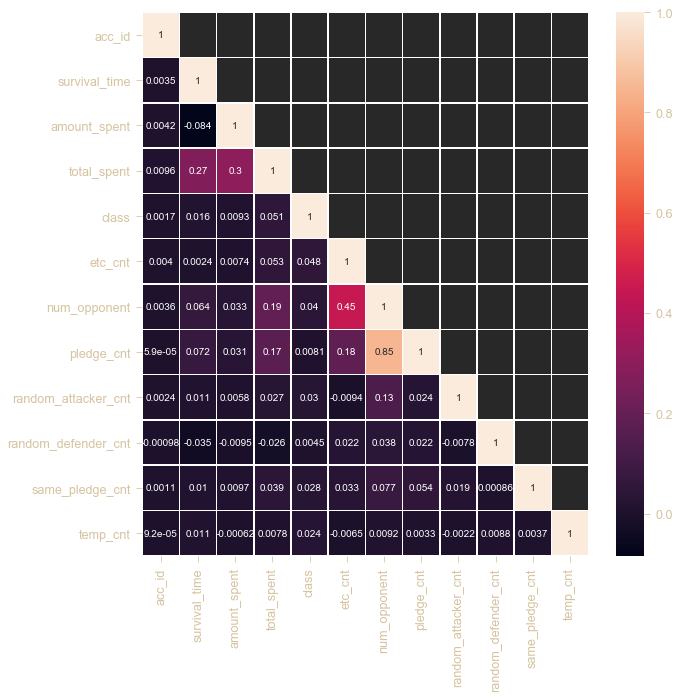

In [104]:
corrMatt=data.corr()
corrMatt

mask=np.array(corrMatt)
mask
mask[np.tril_indices_from(mask)]=False

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corrMatt, mask=mask, annot=True, linewidths=.5, ax=ax)
# sns.heatmap(corrMatt, mask=mask, square=True, annot=True, vmax=0.8) 
# 한쪽 만 나오게하는 상수 역할 코드 

In [105]:
## updating lists 

### correaltion analysis
### rename data column by adding " p "
### "class" feature references 
